In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Step 1: Generate and classify random points
def generate_data(num_points=20, canvas_size=1000):
    np.random.seed(42)
    points = np.random.randint(0, canvas_size, (num_points, 2))
    line_a = 1
    line_b = -1
    line_c = -200
    labels = np.sign(line_a * points[:, 0] + line_b * points[:, 1] + line_c)
    return points, labels, (line_a, line_b, line_c)

In [3]:
# Step 2: Implement Perceptron
class Perceptron:
    def __init__(self, learning_rate=0.0001):
        self.learning_rate = learning_rate
        self.weights = np.random.rand(3)  # Weights including bias
    
    def predict(self, x):
        return np.sign(np.dot(x, self.weights))
    
    def train(self, X, y, max_epochs=1000):
        num_samples = X.shape[0]
        X_aug = np.hstack((X, np.ones((num_samples, 1))))  # Augment with bias term
        for epoch in range(max_epochs):
            misclassified = 0
            for i in range(num_samples):
                prediction = self.predict(X_aug[i])
                if prediction != y[i]:
                    self.weights += self.learning_rate * y[i] * X_aug[i]
                    misclassified += 1
            # Visualization update
            self.visualize(X, y, epoch, misclassified)
            if misclassified == 0:
                break
    
    def visualize(self, X, y, epoch, misclassified):
        plt.clf()
        for point, label in zip(X, y):
            if label == 1:
                plt.scatter(point[0], point[1], color='black')
            else:
                plt.scatter(point[0], point[1], facecolors='none', edgecolors='black')
        x_vals = np.array([0, 1000])
        y_vals = -(self.weights[0] * x_vals + self.weights[2]) / self.weights[1]
        plt.plot(x_vals, y_vals, 'g-')
        plt.xlim(0, 1000)
        plt.ylim(0, 1000)
        plt.title(f'Epoch: {epoch}, Misclassified: {misclassified}')
        plt.pause(0.1)

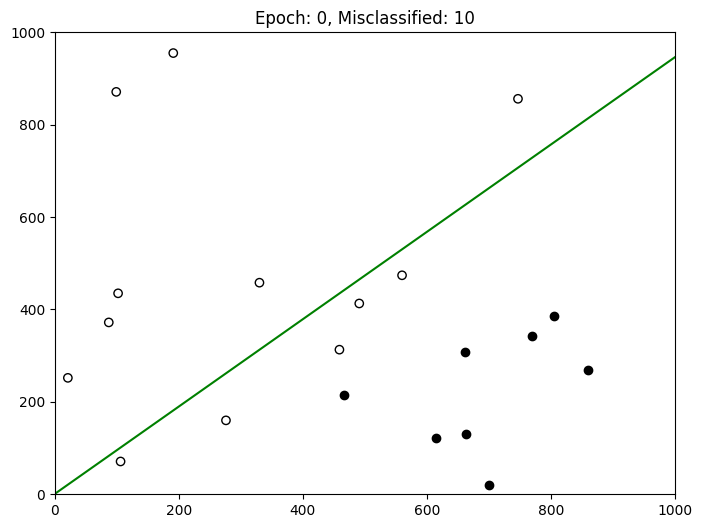

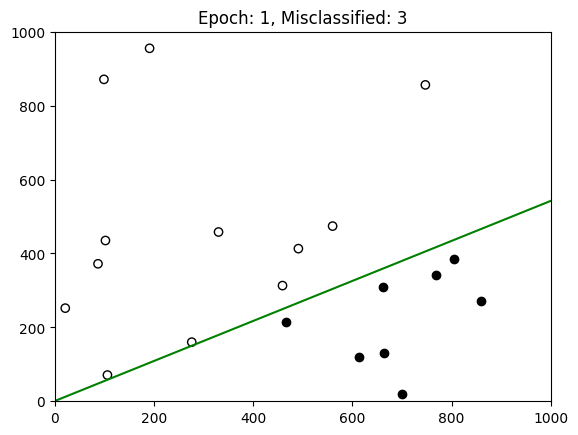

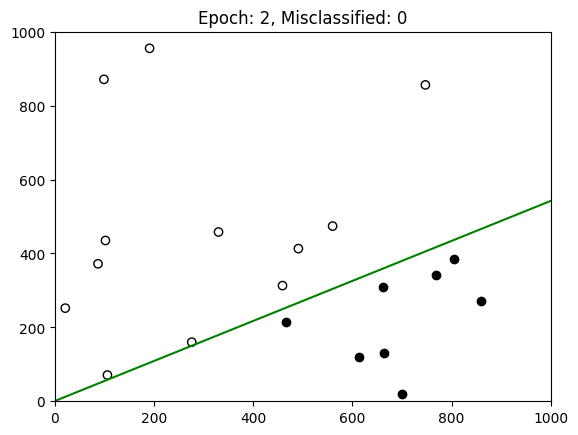

In [4]:
# Step 3: Main Execution
points, labels, true_line = generate_data()
perceptron = Perceptron()
plt.ion()
plt.figure(figsize=(8, 6))
perceptron.train(points, labels)
plt.ioff()
plt.show()